#import 

In [12]:
# Cell 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Make plots a bit prettier
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)


#download

In [13]:
# Cell 3: Download VADER lexicon for sentiment analysis (only first time)
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Load data 

In [17]:
df = pd.read_csv(r"C:\Users\user\Desktop\Project\Mobile-Banking\data\raw\reviews_raw.csv")

print("Column names:")
print(df.columns)

# Change this to match the real column name
df.rename(columns={"content": "review_text"}, inplace=True)

df["review_text"] = df["review_text"].astype(str)

print("Loaded Data:")
display(df.head())



Column names:
Index(['review_id', 'review_text', 'rating', 'review_date', 'bank_code',
       'bank_name', 'user_name', 'thumbs_up', 'reply_content', 'source'],
      dtype='object')
Loaded Data:


,review_id,review_text,rating,review_date,bank_code,bank_name,user_name,thumbs_up,reply_content,source
0,1,Very disappointing application. it's getting w...,1,2025-10-31 19:25:05,DASHEN,Dashen Bank,A.Senay ZENEBE,0,NaN,PlayStore
1,2,"Banking made simple, smart, and safe.",5,2025-10-28 15:35:23,DASHEN,Dashen Bank,Bilen Atinafe,0,NaN,PlayStore
2,3,It is the best of all i liked it i used it alm...,5,2025-10-27 19:37:55,DASHEN,Dashen Bank,Guta Gundo,0,NaN,PlayStore
3,4,gngu,5,2025-10-21 00:31:58,DASHEN,Dashen Bank,Yalelet Ahmed,0,NaN,PlayStore
4,5,"The app is very good , but it does not tell th...",4,2025-09-09 22:24:44,DASHEN,Dashen Bank,Esrael Worku,0,NaN,PlayStore


Sentiment for ML

In [19]:
df["clean_review"] = df["review_text"].str.lower()

# VADER analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["compound"] = df["clean_review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = df["compound"].apply(get_sentiment)

print("\nSentiment Applied:")
display(df.head())




Sentiment Applied:


,review_id,review_text,rating,review_date,bank_code,bank_name,user_name,thumbs_up,reply_content,source,clean_review,compound,sentiment
0,1,Very disappointing application. it's getting w...,1,2025-10-31 19:25:05,DASHEN,Dashen Bank,A.Senay ZENEBE,0,NaN,PlayStore,very disappointing application. it's getting w...,-0.7956,Negative
1,2,"Banking made simple, smart, and safe.",5,2025-10-28 15:35:23,DASHEN,Dashen Bank,Bilen Atinafe,0,NaN,PlayStore,"banking made simple, smart, and safe.",0.6808,Positive
2,3,It is the best of all i liked it i used it alm...,5,2025-10-27 19:37:55,DASHEN,Dashen Bank,Guta Gundo,0,NaN,PlayStore,it is the best of all i liked it i used it alm...,0.8519,Positive
3,4,gngu,5,2025-10-21 00:31:58,DASHEN,Dashen Bank,Yalelet Ahmed,0,NaN,PlayStore,gngu,0.0000,Neutral
4,5,"The app is very good , but it does not tell th...",4,2025-09-09 22:24:44,DASHEN,Dashen Bank,Esrael Worku,0,NaN,PlayStore,"the app is very good , but it does not tell th...",0.7504,Positive


#Text clean

In [20]:
# Cell 6: Simple preprocessing (lowercase)
# (You can extend with stopword removal, lemmatization, etc.)

df["clean_text"] = df["review_text"].str.lower()
df[["review_text", "clean_text"]]


,review_text,clean_text
0,Very disappointing application. it's getting w...,very disappointing application. it's getting w...
1,"Banking made simple, smart, and safe.","banking made simple, smart, and safe."
2,It is the best of all i liked it i used it alm...,it is the best of all i liked it i used it alm...
3,gngu,gngu
4,"The app is very good , but it does not tell th...","the app is very good , but it does not tell th..."
...,...,...
1195,አሪፍ ነው በርቱልን,አሪፍ ነው በርቱልን
1196,Wwwerrr,wwwerrr
1197,ጀማል ውቀቱ,ጀማል ውቀቱ
1198,Great For Financial company,great for financial company


# SAVE RESULTS

In [21]:

output_path =  r"C:\Users\user\Desktop\Project\Mobile-Banking\data\processed\reviews_with_sentiment.csv"
df.to_csv(output_path, index=False)

print("\nSaved sentiment file to:", output_path)


Saved sentiment file to: C:\Users\user\Desktop\Project\Mobile-Banking\data\processed\reviews_with_sentiment.csv


# LOAD BACK 

In [22]:
sent_df = pd.read_csv( r"C:\Users\user\Desktop\Project\Mobile-Banking\data\processed\reviews_with_sentiment.csv")
print("\nLoaded Sentiment File:")
display(sent_df.head())


Loaded Sentiment File:


,review_id,review_text,rating,review_date,bank_code,bank_name,user_name,thumbs_up,reply_content,source,clean_review,compound,sentiment,clean_text
0,1,Very disappointing application. it's getting w...,1,2025-10-31 19:25:05,DASHEN,Dashen Bank,A.Senay ZENEBE,0,NaN,PlayStore,very disappointing application. it's getting w...,-0.7956,Negative,very disappointing application. it's getting w...
1,2,"Banking made simple, smart, and safe.",5,2025-10-28 15:35:23,DASHEN,Dashen Bank,Bilen Atinafe,0,NaN,PlayStore,"banking made simple, smart, and safe.",0.6808,Positive,"banking made simple, smart, and safe."
2,3,It is the best of all i liked it i used it alm...,5,2025-10-27 19:37:55,DASHEN,Dashen Bank,Guta Gundo,0,NaN,PlayStore,it is the best of all i liked it i used it alm...,0.8519,Positive,it is the best of all i liked it i used it alm...
3,4,gngu,5,2025-10-21 00:31:58,DASHEN,Dashen Bank,Yalelet Ahmed,0,NaN,PlayStore,gngu,0.0000,Neutral,gngu
4,5,"The app is very good , but it does not tell th...",4,2025-09-09 22:24:44,DASHEN,Dashen Bank,Esrael Worku,0,NaN,PlayStore,"the app is very good , but it does not tell th...",0.7504,Positive,"the app is very good , but it does not tell th..."


#  visualize

C:\Users\user\AppData\Local\Temp\ipykernel_8548\4288384498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sent_df["sentiment"], palette="coolwarm")


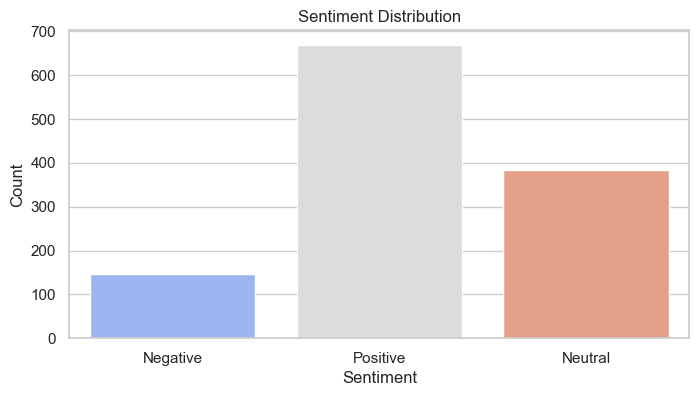

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(x=sent_df["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Lexicon Visualize

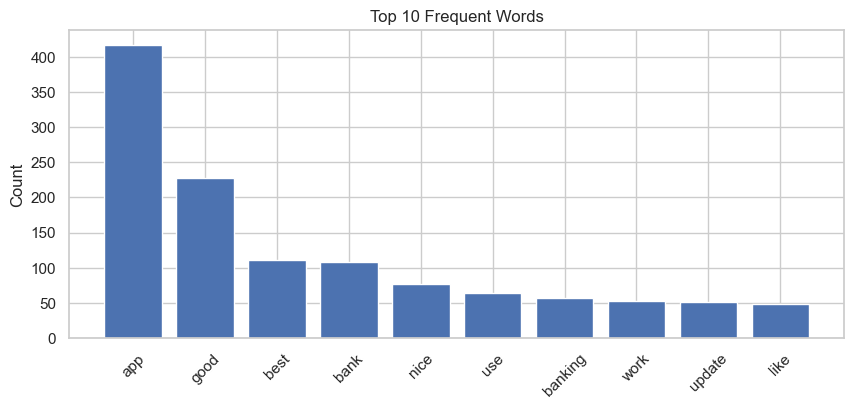

In [24]:
vectorizer = CountVectorizer(stop_words="english")
bow = vectorizer.fit_transform(sent_df["clean_review"])

# Sum word counts
word_sum = bow.sum(axis=0)
word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

freq_df = pd.DataFrame(word_freq, columns=["word", "count"])
freq_df = freq_df.sort_values(by="count", ascending=False)

# Plot top 10 words
top_n = 10
top_words = freq_df.head(top_n)

plt.figure(figsize=(10, 4))
plt.bar(top_words["word"], top_words["count"])
plt.xticks(rotation=45)
plt.title("Top 10 Frequent Words")
plt.ylabel("Count")
plt.show()